# Data Collection (Pandas)

In [55]:
import pandas as pd
df = pd.read_csv('student_results_advanced.csv')
print(df.head())

   Roll_No           Name  Result  Attendance  Assignment_Score  Project_Marks
0        1  Ritika Sharma    57.0       55.58                20             12
1        2    Lalit Patel     NaN       67.62                 8              5
2        3    Ankit Patel    63.0       55.58                 2              4
3        4    Rahul Singh    47.0       74.02                19             15
4        5      Raj Gupta    98.0       71.85                 8             26


# Data Preparation (📊 pandas, numpy)

In [56]:
print(df.isnull().sum())
# df.fillna(df.mean(), inplace = True) for the numeric data type
df.fillna(df.select_dtypes(include='number').mean(), inplace = True) # for string data we use the select_dtypes

Roll_No               0
Name                  0
Result              361
Attendance            0
Assignment_Score      0
Project_Marks         0
dtype: int64


In [57]:
print(df.head())

   Roll_No           Name     Result  Attendance  Assignment_Score  \
0        1  Ritika Sharma  57.000000       55.58                20   
1        2    Lalit Patel  69.597974       67.62                 8   
2        3    Ankit Patel  63.000000       55.58                 2   
3        4    Rahul Singh  47.000000       74.02                19   
4        5      Raj Gupta  98.000000       71.85                 8   

   Project_Marks  
0             12  
1              5  
2              4  
3             15  
4             26  


# Data Wrangling(Feature Engineering & Transformation) (pandas, sklearn.preprocessing) 

In [58]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() # Encode categorical column
df['Name'] = le.fit_transform(df['Name'])
print(df.head())

   Roll_No  Name     Result  Attendance  Assignment_Score  Project_Marks
0        1   104  57.000000       55.58                20             12
1        2    61  69.597974       67.62                 8              5
2        3    25  63.000000       55.58                 2              4
3        4    93  47.000000       74.02                19             15
4        5    96  98.000000       71.85                 8             26


# Data Modeling (Splitting the dataset) (sklearn.model_selection)

In [66]:
from sklearn.model_selection import train_test_split
# x = df.drop('Result', axis = 1) # Features
x = df[['Attendance', 'Assignment_Score', 'Project_Marks']]
y = df['Result']  # Target variable
# Split data (80% training, 20% testing)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

# Model Training (sklearn.linear_model)

In [67]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
print("Model Train Successfully")

Model Train Successfully


# Model Testing (Evaluation) (sklearn.metrics)

In [68]:
from sklearn.metrics import mean_squared_error
y_predict = model.predict(x_test)
mse = mean_squared_error(y_test, y_predict)
print("Mean Square Error: ", mse)

Mean Square Error:  288.46614105346424


# Model Deployment (Data Visualization & Deployment)

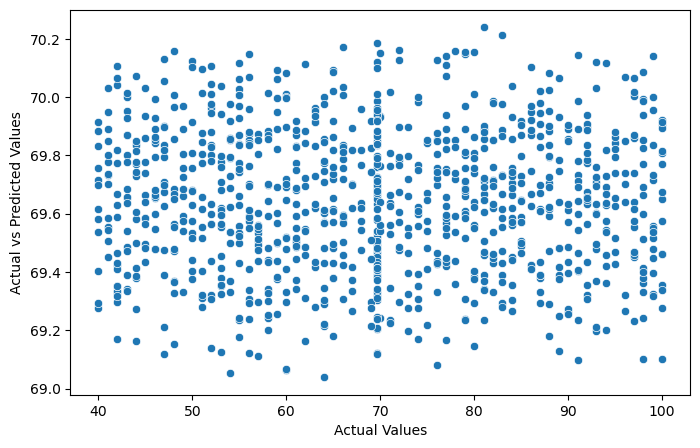

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (8, 5))
sns.scatterplot(x = y_test, y = y_predict)
plt.xlabel("Actual Values")
plt.ylabel("Actual vs Predicted Values")
plt.show()